# Matrices

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

A = np.array([
    [10,20,30],
    [40,50,60]
])
A.shape

(2, 3)

In [33]:
A[1,2]  # 2nd row, 3rd column

60

In [34]:
A[1, :]  # 2nd row vector (as a 1D array)

array([40, 50, 60])

In [35]:
A[:, 2]  # 3rd column vector (as a 1D array)

array([30, 60])

In [36]:
A[1:2, :]  # rows 2 to 3 (excluded): this returns row 2 as a one-row matrix

array([[40, 50, 60]])

In [37]:
A[:, 2:3]  # columns 3 to 4 (excluded): this returns column 3 as a one-column matrix

array([[30],
       [60]])

## Square, triangular, diagonal and identity matrices
A **square matrix** is a matrix that has the same number of rows and columns, for example a $3 \times 3$ matrix:

\begin{bmatrix}
  4 & 9 & 2 \\
  3 & 5 & 7 \\
  8 & 1 & 6
\end{bmatrix}

An **upper triangular matrix** is a special kind of square matrix where all the elements *below* the main diagonal (top-left to bottom-right) are zero, for example:

\begin{bmatrix}
  4 & 9 & 2 \\
  0 & 5 & 7 \\
  0 & 0 & 6
\end{bmatrix}

Similarly, a **lower triangular matrix** is a square matrix where all elements *above* the main diagonal are zero, for example:

\begin{bmatrix}
  4 & 0 & 0 \\
  3 & 5 & 0 \\
  8 & 1 & 6
\end{bmatrix}

A **triangular matrix** is one that is either lower triangular or upper triangular.

A matrix that is both upper and lower triangular is called a **diagonal matrix**, for example:

\begin{bmatrix}
  4 & 0 & 0 \\
  0 & 5 & 0 \\
  0 & 0 & 6
\end{bmatrix}

You can construct a diagonal matrix using NumPy's `diag` function:

In [38]:
np.diag([4, 5, 6])

array([[4, 0, 0],
       [0, 5, 0],
       [0, 0, 6]])

If you pass a matrix to the `diag` function, it will happily extract the diagonal values:

In [39]:
D = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ])
np.diag(D)

array([1, 5, 9])

Finally, the **identity matrix** of size $n$, noted $I_n$, is a diagonal matrix of size $n \times n$ with $1$'s in the main diagonal, for example $I_3$:

\begin{bmatrix}
  1 & 0 & 0 \\
  0 & 1 & 0 \\
  0 & 0 & 1
\end{bmatrix}

Numpy's `eye` function returns the identity matrix of the desired size:

In [40]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

The identity matrix is often noted simply $I$ (instead of $I_n$) when its size is clear given the context. It is called the *identity* matrix because multiplying a matrix with it leaves the matrix unchanged as we will see below.

In [41]:
B = np.array([[1,2,3], [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6]])

## Matrix multiplication
So far, matrix operations have been rather intuitive. But multiplying matrices is a bit more involved.

A matrix $Q$ of size $m \times n$ can be multiplied by a matrix $R$ of size $n \times q$. It is noted simply $QR$ without multiplication sign or dot. The result $P$ is an $m \times q$ matrix where each element is computed as a sum of products:

$P_{i,j} = \sum_{k=1}^n{Q_{i,k} \times R_{k,j}}$

The element at position $i,j$ in the resulting matrix is the sum of the products of elements in row $i$ of matrix $Q$ by the elements in column $j$ of matrix $R$.

$P =
\begin{bmatrix}
Q_{11} R_{11} + Q_{12} R_{21} + \cdots + Q_{1n} R_{n1} &
  Q_{11} R_{12} + Q_{12} R_{22} + \cdots + Q_{1n} R_{n2} &
    \cdots &
      Q_{11} R_{1q} + Q_{12} R_{2q} + \cdots + Q_{1n} R_{nq} \\
Q_{21} R_{11} + Q_{22} R_{21} + \cdots + Q_{2n} R_{n1} &
  Q_{21} R_{12} + Q_{22} R_{22} + \cdots + Q_{2n} R_{n2} &
    \cdots &
      Q_{21} R_{1q} + Q_{22} R_{2q} + \cdots + Q_{2n} R_{nq} \\
  \vdots & \vdots & \ddots & \vdots \\
Q_{m1} R_{11} + Q_{m2} R_{21} + \cdots + Q_{mn} R_{n1} &
  Q_{m1} R_{12} + Q_{m2} R_{22} + \cdots + Q_{mn} R_{n2} &
    \cdots &
      Q_{m1} R_{1q} + Q_{m2} R_{2q} + \cdots + Q_{mn} R_{nq}
\end{bmatrix}$

You may notice that each element $P_{i,j}$ is the dot product of the row vector $Q_{i,*}$ and the column vector $R_{*,j}$:

$P_{i,j} = Q_{i,*} \cdot R_{*,j}$

So we can rewrite $P$ more concisely as:

$P =
\begin{bmatrix}
Q_{1,*} \cdot R_{*,1} & Q_{1,*} \cdot R_{*,2} & \cdots & Q_{1,*} \cdot R_{*,q} \\
Q_{2,*} \cdot R_{*,1} & Q_{2,*} \cdot R_{*,2} & \cdots & Q_{2,*} \cdot R_{*,q} \\
\vdots & \vdots & \ddots & \vdots \\
Q_{m,*} \cdot R_{*,1} & Q_{m,*} \cdot R_{*,2} & \cdots & Q_{m,*} \cdot R_{*,q}
\end{bmatrix}$


Let's multiply two matrices in NumPy, using `ndarray`'s `dot` method:

$E = AD = \begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix} 
\begin{bmatrix}
  2 & 3 & 5 & 7 \\
  11 & 13 & 17 & 19 \\
  23 & 29 & 31 & 37
\end{bmatrix} = 
\begin{bmatrix}
  930 & 1160 & 1320 & 1560 \\
  2010 & 2510 & 2910 & 3450
\end{bmatrix}$

In [5]:
D = np.array([
        [ 2,  3,  5,  7],
        [11, 13, 17, 19],
        [23, 29, 31, 37]
    ])
print(A @ D)
print(A.dot(D))
print(D.dot(A))

[[ 930 1160 1320 1560]
 [2010 2510 2910 3450]]
[[ 930 1160 1320 1560]
 [2010 2510 2910 3450]]


ValueError: shapes (3,4) and (2,3) not aligned: 4 (dim 1) != 2 (dim 0)

In [54]:
40*5 + 50*17 + 60*31

2910

## Matrix transpose

In [67]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [68]:
A.T

array([[10, 40],
       [20, 50],
       [30, 60]])

The product of a matrix by its transpose is always a symmetric matrix, for example:

In [74]:
D.dot(D.T)

array([[  87,  279,  547],
       [ 279,  940, 1860],
       [ 547, 1860, 3700]])

## Converting 1D arrays to 2D arrays in NumPy
As we mentionned earlier, in NumPy (as opposed to Matlab, for example), 1D really means 1D: there is no such thing as a vertical 1D-array or a horizontal 1D-array. So you should not be surprised to see that transposing a 1D array does not do anything:

We want to convert $\textbf{u}$ into a row vector before transposing it. There are a few ways to do this:

In [8]:
u_row = np.array([[2, 5]])
u_row.T

array([[2],
       [5]])

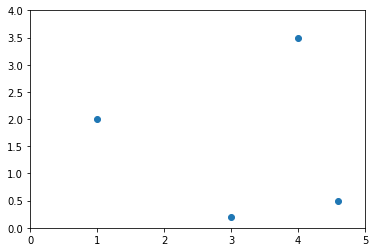

In [20]:
P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])
x_coords_P, y_coords_P = P
plt.scatter(x_coords_P, y_coords_P)
plt.axis([0, 5, 0, 4])
plt.show()

### Matrix multiplication – Projection onto an axis
Matrix multiplication is more complex to visualize, but it is also the most powerful tool in the box.

Let's start simple, by defining a $1 \times 2$ matrix $U = \begin{bmatrix} 1 & 0 \end{bmatrix}$. This row vector is just the horizontal unit vector.

In [15]:
U = np.array([[1, 0]])

Now let's look at the dot product $U \cdot P$:

In [91]:
U.dot(P)

array([[ 3. ,  4. ,  1. ,  4.6]])

We can actually project on any other axis by just replacing $U$ with any other unit vector. For example, let's project on the axis that is at a 30° angle above the horizontal axis:

In [17]:
angle30 = 30 * np.pi / 180  # angle in radians
U_30 = np.array([[np.cos(angle30), np.sin(angle30)]])
print(U_30.dot(P))

[[2.69807621 5.21410162 1.8660254  4.23371686]]


Good! Remember that the dot product of a unit vector and a matrix basically performs a projection on an axis and gives us the coordinates of the resulting points on that axis.

### Matrix multiplication – Rotation
Now let's create a $2 \times 2$ matrix $V$ containing two unit vectors that make 30° and 120° angles with the horizontal axis:

$V = \begin{bmatrix} \cos(30°) & \sin(30°) \\ \cos(120°) & \sin(120°) \end{bmatrix}$

In [94]:
angle120 = 120 * np.pi / 180
V = np.array([
        [np.cos(angle30), np.sin(angle30)],
        [np.cos(angle120), np.sin(angle120)]
    ])
V

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

Let's look at the product $VP$:

In [95]:
V.dot(P)

array([[ 2.69807621,  5.21410162,  1.8660254 ,  4.23371686],
       [-1.32679492,  1.03108891,  1.23205081, -1.8669873 ]])

In [4]:
F_shear = np.array([
        [1, 1.5],
        [0, 1]
    ])
Square = np.array([
    [0, 0, 1, 1],
    [0, 1, 1, 0]
])
print(F_shear.dot(Square))

[[0.  1.5 2.5 1. ]
 [0.  1.  1.  0. ]]


In [26]:
F_squeeze = np.array([
        [1.4, 0],
        [0, 1/1.4]
    ])
print(F_squeeze.dot(Square))


[[0.         0.         1.4        1.4       ]
 [0.         0.71428571 0.71428571 0.        ]]


In [27]:
F_reflect = np.array([
        [1, 0],
        [0, -1]
    ])
print(F_reflect.dot(Square))

[[ 0  0  1  1]
 [ 0 -1 -1  0]]


In [103]:
F_inv_shear = LA.inv(F_shear)
F_inv_shear

array([[ 1. , -1.5],
       [ 0. ,  1. ]])

Only square matrices can be inversed. This makes sense when you think about it: if you have a transformation that reduces the number of dimensions, then some information is lost and there is no way that you can get it back. For example say you use a $2 \times 3$ matrix to project a 3D object onto a plane. The result may look like this:

In [31]:
F_project = np.array([
        [1, 0],
        [0, 0]
    ])
try:
    LA.inv(F_project)
except LA.LinAlgError as e:
    print("LinAlgError:", e)

LinAlgError: Singular matrix


Here is another example of a singular matrix. This one performs a projection onto the axis at a 30° angle above the horizontal axis:

In [33]:
angle30 = 30 * np.pi / 180
F_project_30 = np.array([
               [np.cos(angle30)**2, np.sin(2*angle30)/2],
               [np.sin(2*angle30)/2, np.sin(angle30)**2]
         ])
LA.inv(F_project_30)

array([[ 1.20095990e+16, -2.08012357e+16],
       [-2.08012357e+16,  3.60287970e+16]])

But this time, due to floating point rounding errors, NumPy manages to calculate an inverse (notice how large the elements are, though):

As you might expect, the dot product of a matrix by its inverse results in the identity matrix:

$M \cdot M^{-1} = M^{-1} \cdot M = I$

This makes sense since doing a linear transformation followed by the inverse transformation results in no change at all.

In [109]:
F_shear.dot(LA.inv(F_shear))

array([[ 1.,  0.],
       [ 0.,  1.]])

## Determinant
The determinant of a square matrix $M$, noted $\det(M)$ or $\det M$ or $|M|$ is a value that can be calculated from its elements $(M_{i,j})$ using various equivalent methods. One of the simplest methods is this recursive approach:

$|M| = M_{1,1}\times|M^{(1,1)}| - M_{2,1}\times|M^{(2,1)}| + M_{3,1}\times|M^{(3,1)}| - M_{4,1}\times|M^{(4,1)}| + \cdots ± M_{n,1}\times|M^{(n,1)}|$

* Where $M^{(i,j)}$ is the matrix $M$ without row $i$ and column $j$.

For example, let's calculate the determinant of the following $3 \times 3$ matrix:

$M = \begin{bmatrix}
  1 & 2 & 3 \\
  4 & 5 & 6 \\
  7 & 8 & 0
\end{bmatrix}$

Using the method above, we get:

$|M| = 1 \times \left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right |
     - 2 \times \left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right |
     + 3 \times \left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right |$

Now we need to compute the determinant of each of these $2 \times 2$ matrices (these determinants are called **minors**):

$\left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right | = 5 \times 0 - 6 \times 8 = -48$

$\left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right | = 4 \times 0 - 6 \times 7 = -42$

$\left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right | = 4 \times 8 - 5 \times 7 = -3$

Now we can calculate the final result:

$|M| = 1 \times (-48) - 2 \times (-42) + 3 \times (-3) = 27$

To get the determinant of a matrix, you can call NumPy's `det` function in the `numpy.linalg` module:

In [113]:
M = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]
    ])
LA.det(M)

27.0

One of the main uses of the determinant is to *determine* whether a square matrix can be inversed or not: if the determinant is equal to 0, then the matrix *cannot* be inversed (it is a singular matrix), and if the determinant is not 0, then it *can* be inversed.

For example, let's compute the determinant for the $F_{project}$, $F_{project\_30}$ and $F_{shear}$ matrices that we defined earlier:

In [114]:
LA.det(F_project)

0.0

In [116]:
LA.det(F_shear)

1.0

The determinant can also be used to measure how much a linear transformation affects surface areas: for example, the projection matrices $F_{project}$ and $F_{project\_30}$ completely flatten the polygon $P$, until its area is zero. This is why the determinant of these matrices is 0. The shear mapping modified the shape of the polygon, but it did not affect its surface area, which is why the determinant is 1. You can try computing the determinant of a rotation matrix, and you should also find 1. What about a scaling matrix? Let's see:

In [35]:
F_scale = np.array([
        [0.5, 0],
        [0, 0.5]
    ])
LA.det(F_scale)

0.25

Correct!

The determinant can actually be negative, when the transformation results in a "flipped over" version of the original polygon (eg. a left hand glove becomes a right hand glove). For example, the determinant of the `F_reflect` matrix is -1 because the surface area is preserved but the polygon gets flipped over:

In [119]:
LA.det(F_reflect)

-1.0

## Singular Value Decomposition
It turns out that any $m \times n$ matrix $M$ can be decomposed into the dot product of three simple matrices:
* a rotation matrix $U$ (an $m \times m$ orthogonal matrix)
* a scaling & projecting matrix $\Sigma$ (an $m \times n$ diagonal matrix)
* and another rotation matrix $V^T$ (an $n \times n$ orthogonal matrix)

$M = U \cdot \Sigma \cdot V^{T}$

For example, let's decompose the shear transformation:

In [5]:
U, S_diag, V_T = LA.svd(F_shear) # note: in python 3 you can rename S_diag to Σ_diag
print(U)
print(np.diag(S_diag))
print(V_T)

[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]
[[2.  0. ]
 [0.  0.5]]
[[ 0.4472136   0.89442719]
 [-0.89442719  0.4472136 ]]


## Eigenvectors and eigenvalues
An **eigenvector** of a square matrix $M$ (also called a **characteristic vector**) is a non-zero vector that remains on the same line after transformation by the linear transformation associated with $M$. A more formal definition is any vector $v$ such that:

$M \cdot v = \lambda \times v$

Where $\lambda$ is a scalar value called the **eigenvalue** associated to the vector $v$.

For example, any horizontal vector remains horizontal after applying the shear mapping (as you can see on the image above), so it is an eigenvector of $M$. A vertical vector ends up tilted to the right, so vertical vectors are *NOT* eigenvectors of $M$.

If we look at the squeeze mapping, we find that any horizontal or vertical vector keeps its direction (although its length changes), so all horizontal and vertical vectors are eigenvectors of $F_{squeeze}$.

However, rotation matrices have no eigenvectors at all (except if the rotation angle is 0° or 180°, in which case all non-zero vectors are eigenvectors).

NumPy's `eig` function returns the list of unit eigenvectors and their corresponding eigenvalues for any square matrix. Let's look at the eigenvectors and eigenvalues of the squeeze mapping matrix $F_{squeeze}$:

In [132]:
eigenvalues, eigenvectors = LA.eig(F_squeeze)
eigenvalues # [λ0, λ1, …]

array([ 1.4       ,  0.71428571])

In [133]:
eigenvectors # [v0, v1, …]

array([[ 1.,  0.],
       [ 0.,  1.]])

Indeed the horizontal vectors are stretched by a factor of 1.4, and the vertical vectors are shrunk by a factor of 1/1.4=0.714…, so far so good. Let's look at the shear mapping matrix $F_{shear}$: